In [1]:
# SGO : OBJECTIVE FUNCTION : f(x) = min ( ∑k∈K ∑i∈L (ck,i . fk,i) + ∑p∈P ∑r∈P (farep − brp . farer) . trp))

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Input instructions

pop = int(input("Enter the Number of Different Types of Flights Available: "))
dim_cost = int(input("Enter the Total Number of Flight Legs Available: "))
trp = int(input("Enter the Number of Redirected Passengers: "))
itr = int(input("Enter the Number of Iteration : "))
constant = 0.5

In [6]:
# 2. Initialize random population

initial_fare = np.random.randint(2500, 1000000, size=(pop, 2)).astype(float)
experimetal_fare = np.copy(initial_fare)
initial_cost = np.random.randint(400000, 35000000, size=(pop, dim_cost)).astype(float)
experimetal_cost = np.copy(initial_cost)
initial_fki_cost = np.random.randint(0, 2, size=(pop, dim_cost))
initial_takeoff_time = (np.sort(np.random.rand(pop, 2) * 24, axis=1)).astype(float)
experimetal_takeoff_time = np.copy(initial_takeoff_time)
initial_duration = (np.random.rand(pop, 2) * 22 + 2).astype(float)
experimetal_duration = np.copy(initial_duration)

In [10]:
# 3. Rescheduling Objective Function f(x) = min ( ∑k∈K ∑i∈L (ck,i . fk,i) + ∑p∈P ∑r∈P (farep − brp . farer) . trp)

def Objective_Function(initial_fare, initial_cost, initial_takeoff_time, initial_duration, initial_fki_cost, pop, dim_cost, trp):
    objective_pop = [[0, 0] for _ in range(pop)]    
    for i in range(pop):
        total_cost = 0
        for j in range(dim_cost):
            total_cost += initial_fki_cost[i][j] * initial_cost[i][j]
        objective_pop[i][0] = total_cost

        # Adjustment factor f for fare
        if abs(initial_fare[i][0] - initial_fare[i][1]) > 2 * initial_fare[i][1]:
            f = 0
        elif abs(initial_fare[i][0] - initial_fare[i][1]) < 0.5 * initial_fare[i][1]:
            f = 1
        else:
            f = 0.5

        # Adjustment factor tot for takeoff time
        if abs(initial_takeoff_time[i][0] - initial_takeoff_time[i][1]) > 2 * initial_takeoff_time[i][1]:
            tot = 0
        elif abs(initial_takeoff_time[i][0] - initial_takeoff_time[i][1]) < 0.5 * initial_takeoff_time[i][1]:
            tot = 1
        else:
            tot = 0.5

        # Adjustment factor td for total duration
        if abs(initial_duration[i][0] - initial_duration[i][1]) > 2 * initial_duration[i][1]:
            td = 0
        elif abs(initial_duration[i][0] - initial_duration[i][1]) < 0.5 * initial_duration[i][1]:
            td = 1
        else:
            td = 0.5

        brp = (f + tot + td) / 3
        total_fare = abs(initial_fare[i][0] - brp * initial_fare[i][1]) * trp
        objective_pop[i][1] = total_fare
    
    return objective_pop

objective_pop = Objective_Function(initial_fare, initial_cost, initial_takeoff_time, initial_duration, initial_fki_cost, pop, dim_cost, trp)
for row in objective_pop:
    print(" ".join(f"{value:.2f}" for value in row))

43130444.00 28922836.67
50807432.00 24372985.00
48215641.00 13822983.33
155443348.00 5484398.33
113787245.00 335948.33


In [11]:
# 4. Find gbest

def find_gbest(objective_pop, pop):
    gbest_list = [sum(x for x in objective_pop[i]) for i in range(pop)]
    gbest = min(gbest_list)
    gbest_row = gbest_list.index(gbest)
    return gbest_list ,gbest, gbest_row

gbest_list0, gbest0, gbest_row = find_gbest(objective_pop, pop)
gbest_values = [gbest0]
print(f"gbest at 0th Iteration (Initialization) : {gbest0}")
print(f"Corresponding Flight Type : {gbest_row + 1}")

gbest at 0th Iteration (Initialization) : 62038624.33333333
Corresponding Flight Type : 3


In [12]:
# 5.(i) Phase I : Improving

def improving_phase(experimental_pop, pop, dim, gbest_row):
    modified_pop = np.copy(experimental_pop)
    for i in range(pop):
        for j in range(dim):
            rdm = random.random()
            modified_pop[i, j] = constant * experimental_pop[i, j] + rdm * (experimental_pop[gbest_row, j] - experimental_pop[i, j])
    return modified_pop

In [13]:
# 5.(ii) Phase II : Acquiring

def acquring_phase(modified_pop, pop, dim, gbest_list_ip, gbest_row_ip):
    modified_popp = np.copy(modified_pop)
    for i in range(pop):
        other_Xr = [index for index in range(pop) if index != i]
        Xr_row = random.choice(other_Xr)
        Xr = random.choice(modified_pop[Xr_row])
        fXr = gbest_list_ip[Xr_row]
        fXi = gbest_list_ip[i]

        for j in range(dim):
            rdm1 = random.random()
            rdm2 = random.random()
            if fXi < fXr:
                modified_popp[i, j] = modified_pop[i, j] + rdm1 * (modified_pop[i, j] - modified_pop[Xr_row, j]) + rdm2 * (modified_pop[gbest_row_ip, j] - modified_pop[i, j])
            else:                        
                modified_popp[i, j] = modified_pop[i, j] + rdm1 * (modified_pop[Xr_row, j] - modified_pop[i, j]) + rdm2 * (modified_pop[gbest_row_ip, j] - modified_pop[i, j])
    return modified_popp

In [14]:
# 6. Update the population

for count in range(itr):
    print(f"\nITERATION : {count + 1}")

    z = 0
    c = 0
    while z == 0:
        c += 1

        modified_cost_pop = improving_phase(experimetal_cost, pop, dim_cost, gbest_row)
        modified_fare_pop = improving_phase(experimetal_fare, pop, dim=2, gbest_row=gbest_row)
        modified_takeoff_pop = improving_phase(experimetal_takeoff_time, pop, dim=2, gbest_row=gbest_row)
        modified_duration_pop = improving_phase(experimetal_duration, pop, dim=2, gbest_row=gbest_row)

        modified_objective_pop = Objective_Function(modified_fare_pop, modified_cost_pop, modified_takeoff_pop, modified_duration_pop, initial_fki_cost, pop, dim_cost, trp)

        gbest_list_ip, gbest_ip, gbest_row_ip = find_gbest(modified_objective_pop, pop)

        if gbest_ip < gbest0 and gbest_ip > 0:
            print(f"Improving Phase Accepted after {c} Attempt and gbest at This Stage : {gbest_ip}")
            z = 1
        else:
            z = 0


    z = 0
    c = 0
    while z == 0:
        c += 1

        modified_cost_popp = acquring_phase(modified_cost_pop, pop, dim_cost, gbest_list_ip, gbest_row_ip)
        modified_fare_popp = acquring_phase(modified_fare_pop, pop, dim=2, gbest_list_ip=gbest_list_ip, gbest_row_ip=gbest_row_ip)
        modified_takeoff_popp = acquring_phase(modified_takeoff_pop, pop, dim=2, gbest_list_ip=gbest_list_ip, gbest_row_ip=gbest_row_ip)
        modified_duration_popp = acquring_phase(modified_duration_pop, pop, dim=2, gbest_list_ip=gbest_list_ip, gbest_row_ip=gbest_row_ip)

        modified_objective_popp = Objective_Function(modified_fare_popp, modified_cost_popp, modified_takeoff_popp, modified_duration_popp, initial_fki_cost, pop, dim_cost, trp)

        gbest_list_ap, gbest_ap, gbest_row_ap = find_gbest(modified_objective_popp, pop)

        if gbest_ap < gbest_ip and gbest_ap > 0:
            print(f"Acquiring Phase Accepted after {c} Attempt and gbest at This Stage : {gbest_ap}")
            z = 1
        else:
            z = 0

    print(f"gbest at Iteration {count + 1} : {gbest_ap}")
    gbest_values.append(gbest_ap)
    print(f"Corresponding Flight Type : {gbest_row_ap + 1}")

    experimetal_cost = modified_cost_popp
    experimetal_fare = modified_fare_popp
    experimetal_takeoff_time = modified_takeoff_popp
    experimetal_duration = modified_duration_popp

    gbest_row = gbest_row_ap


ITERATION : 1
Improving Phase Accepted after 1 Attempt and gbest at This Stage : 24316367.57312072
Acquiring Phase Accepted after 1 Attempt and gbest at This Stage : 21248309.96663826
gbest at Iteration 1 : 21248309.96663826
Corresponding Flight Type : 2

ITERATION : 2
Improving Phase Accepted after 1 Attempt and gbest at This Stage : 9429123.576605374
Acquiring Phase Accepted after 1 Attempt and gbest at This Stage : 8709212.661065359
gbest at Iteration 2 : 8709212.661065359
Corresponding Flight Type : 3

ITERATION : 3
Improving Phase Accepted after 1 Attempt and gbest at This Stage : 109854.44067728193
Acquiring Phase Accepted after 219 Attempt and gbest at This Stage : 94567.65717645292
gbest at Iteration 3 : 94567.65717645292
Corresponding Flight Type : 1

ITERATION : 4
Improving Phase Accepted after 11 Attempt and gbest at This Stage : 47283.82858822646
Acquiring Phase Accepted after 17 Attempt and gbest at This Stage : 38582.5837627646
gbest at Iteration 4 : 38582.5837627646
Cor

In [15]:
# 7. Display Results
print("\nRESCHEDULED FLIGHT DETAILS:\n")
print(f"FLIGHT TYPE : {gbest_row + 1}")
print(f"TRAVEL FARE : {initial_fare[gbest_row][1]}")
hrs = int(initial_duration[gbest_row][1])
min = (initial_duration[gbest_row][1] - hrs) * 60
sec = (min - int(min)) * 60
print(f"TOTAL DURATION : {hrs} hours {int(min)} minutes {round(sec)} seconds")
hour = int(initial_takeoff_time[gbest_row][1])
minute = (initial_takeoff_time[gbest_row][1] - hour) * 60
second = (minute - int(minute)) * 60
period = " AM" if hour < 12 else " PM"
hour = hour if hour <= 12 else (hour - 12)
minute = int(minute)
second = round(second)
print(f"TAKEOFF TIME : {hour} : {minute:02d} : {second:02d}{period}")
gb_row = initial_fki_cost[gbest_row]
flight_legs = [col_index + 1 for col_index, value in enumerate(gb_row) if value == 1]
print(f"INVOLVED FLIGHT LEGS : {flight_legs}")
print(f"TOTAL OPERATIONAL COST IN REDIRECTED ITINERARY 2 INCLUDING ALL THE FLIGHT LEGS {flight_legs} : {initial_cost[gbest_row][1]}")


RESCHEDULED FLIGHT DETAILS:

FLIGHT TYPE : 5
TRAVEL FARE : 617062.0
TOTAL DURATION : 13 hours 0 minutes 28 seconds
TAKEOFF TIME : 8 : 34 : 42 AM
INVOLVED FLIGHT LEGS : [2, 3, 4, 5, 6]
TOTAL OPERATIONAL COST IN REDIRECTED ITINERARY 2 INCLUDING ALL THE FLIGHT LEGS [2, 3, 4, 5, 6] : 33227194.0


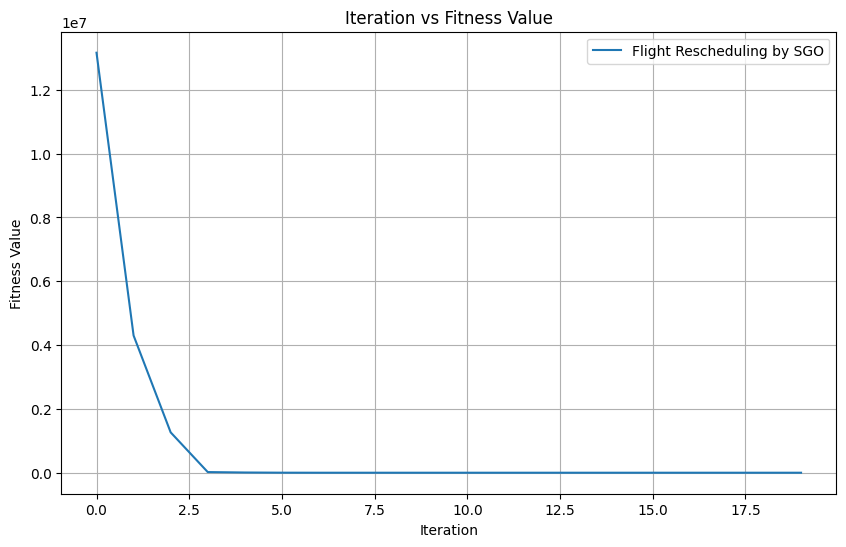

In [16]:
# 8. Graphical Results

iterations = list(range(itr + 1))

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 7

smoothed_SGO = moving_average(gbest_values, window_size)
smoothed_iterations = iterations[:len(smoothed_SGO)]

# 9. Plotting
plt.figure(figsize=(10, 6))
plt.plot(smoothed_iterations, smoothed_SGO, label='Flight Rescheduling by SGO')
plt.title('Iteration vs Fitness Value')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.legend()
plt.grid(True)
plt.show()